In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [32]:
X, y = make_blobs(1000, centers=2, random_state=0)

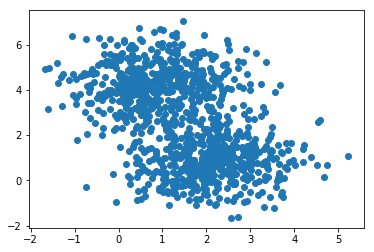

In [33]:
plt.scatter(X[:, 0], X[:, 1])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [64]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict_point(self, point):
        
        distances = []
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(x_item, point)
            distances.append((dis, y_item))
            
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        return vals[np.argmax(counts)]
    
    def predict(self, X):
        res = []
        for point in X:
            v = self.predict_point(point)
            res.append(v)
        return np.array(res, dtype=int)
    
    def score(self, X, y):
        return sum(self.predict(X) == y)/len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1-p2)**2)

In [65]:
model = KNN(5)

In [66]:
model.fit(X_train, y_train)

In [67]:
model.predict(X_test[:10])

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [68]:
model.score(X_test, y_test)

0.9545454545454546

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
m2 = KNeighborsClassifier(5)

In [71]:
m2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
m2.score(X_test, y_test)

0.9545454545454546

In [73]:
m2.predict(X_test[:10])

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])